In [92]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import add, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [93]:
data = pd.read_csv("/content/creditcard.csv")

In [94]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [95]:
data.shape

(43664, 31)

0.0    43529
1.0      134
Name: Class, dtype: int64

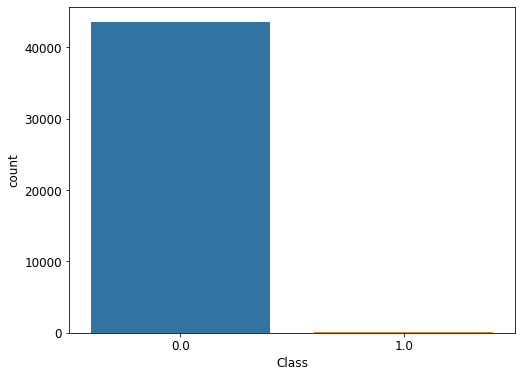

In [96]:
sns.countplot(x=data['Class'])
data["Class"].value_counts()

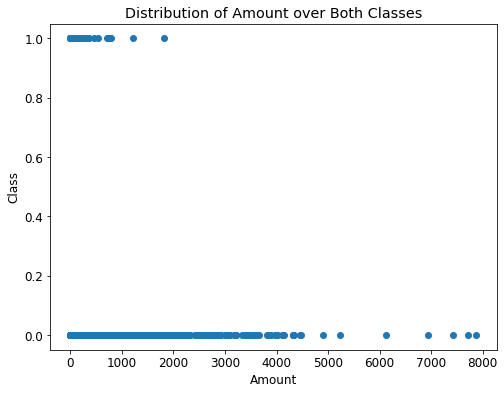

In [97]:
plt.rcParams["figure.figsize"] = "8,6"
font = {'size': 12}
plt.rc('font', **font)

plt.title("Distribution of Amount over Both Classes")
plt.xlabel("Amount")
plt.ylabel("Class")

plt.scatter(data["Amount"],data["Class"])

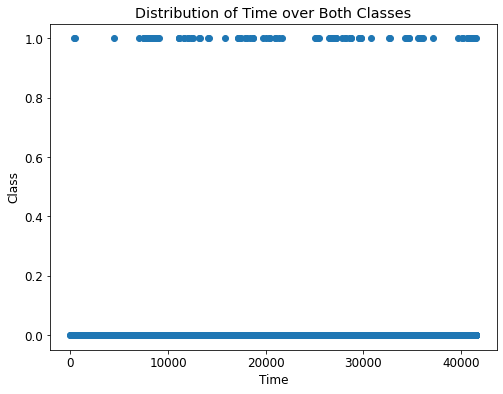

In [98]:
plt.rcParams["figure.figsize"] = "8,6"
font = {'size': 12}
plt.rc('font', **font)

plt.title("Distribution of Time over Both Classes")
plt.xlabel("Time")
plt.ylabel("Class")

plt.scatter(data["Time"],data["Class"])

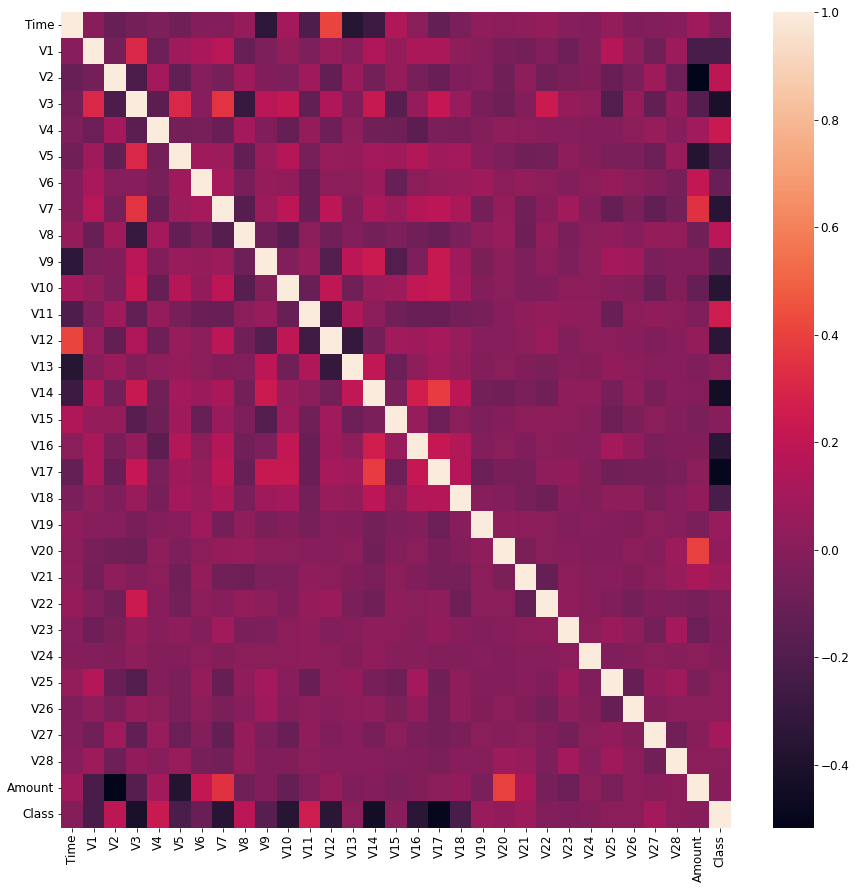

In [99]:
correlation = data.corr()
fig = plt.subplots(figsize=(15,15)) 
sns.heatmap(correlation, vmax= 1 )

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()


In [102]:
data_clean = data.copy()

In [103]:
data_clean['Scaler_amount'] = scaler.fit_transform(data_clean['Amount'].values.reshape(-1, 1))
data_clean['Scaler_time'] = scaler.fit_transform(data_clean['Time'].values.reshape(-1, 1))

In [104]:
data_clean.drop(['Time','Amount'], axis = 1, inplace = True)

In [105]:
data_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaler_amount,Scaler_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.248726,-2.098211
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.367490,-2.098211
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.209306,-2.098133
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.139180,-2.098133
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.085237,-2.098055


In [106]:
percent = (data_clean.isnull().sum() / 79317)

In [107]:
print(percent)

V1               0.000000
V2               0.000000
V3               0.000000
V4               0.000000
V5               0.000000
V6               0.000000
V7               0.000000
V8               0.000000
V9               0.000000
V10              0.000000
V11              0.000000
V12              0.000000
V13              0.000000
V14              0.000000
V15              0.000000
V16              0.000000
V17              0.000000
V18              0.000000
V19              0.000000
V20              0.000000
V21              0.000000
V22              0.000000
V23              0.000000
V24              0.000000
V25              0.000000
V26              0.000000
V27              0.000013
V28              0.000013
Class            0.000013
Scaler_amount    0.000013
Scaler_time      0.000000
dtype: float64


In [108]:
data_clean['V11'].fillna(data_clean['V11'].mean(), inplace = True)
data_clean['V12'].fillna(data_clean['V12'].mean(), inplace = True)
data_clean['V13'].fillna(data_clean['V13'].mean(), inplace = True)
data_clean['V14'].fillna(data_clean['V14'].mean(), inplace = True)
data_clean['V15'].fillna(data_clean['V15'].mean(), inplace = True)
data_clean['V16'].fillna(data_clean['V16'].mean(), inplace = True)
data_clean['V17'].fillna(data_clean['V17'].mean(), inplace = True)
data_clean['V18'].fillna(data_clean['V18'].mean(), inplace = True)
data_clean['V19'].fillna(data_clean['V19'].mean(), inplace = True)
data_clean['V20'].fillna(data_clean['V20'].mean(), inplace = True)
data_clean['V21'].fillna(data_clean['V21'].mean(), inplace = True)
data_clean['V22'].fillna(data_clean['V22'].mean(), inplace = True)
data_clean['V23'].fillna(data_clean['V23'].mean(), inplace = True)
data_clean['V24'].fillna(data_clean['V24'].mean(), inplace = True)
data_clean['V25'].fillna(data_clean['V25'].mean(), inplace = True)
data_clean['V26'].fillna(data_clean['V26'].mean(), inplace = True)
data_clean['V27'].fillna(data_clean['V27'].mean(), inplace = True)
data_clean['V28'].fillna(data_clean['V28'].mean(), inplace = True)
data_clean['Class'].fillna(0.0, inplace = True)
data_clean['Scaler_amount'].fillna(data_clean['Scaler_amount'].mean(), inplace = True)

In [109]:
percent = (data_clean.isnull().sum() / 79317)
print(percent)

V1               0.0
V2               0.0
V3               0.0
V4               0.0
V5               0.0
V6               0.0
V7               0.0
V8               0.0
V9               0.0
V10              0.0
V11              0.0
V12              0.0
V13              0.0
V14              0.0
V15              0.0
V16              0.0
V17              0.0
V18              0.0
V19              0.0
V20              0.0
V21              0.0
V22              0.0
V23              0.0
V24              0.0
V25              0.0
V26              0.0
V27              0.0
V28              0.0
Class            0.0
Scaler_amount    0.0
Scaler_time      0.0
dtype: float64


In [110]:
X = data_clean.drop('Class', axis=1)
y = data_clean['Class']

In [111]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 42,shuffle=True)

0.0    86
1.0    86
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


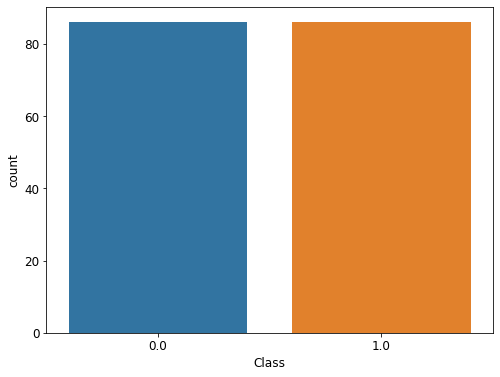

In [112]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print(pd.Series(y_rus).value_counts())
sns.countplot(y_rus);

In [113]:
smote = SMOTE()

In [114]:
X_smo, y_smo = smote.fit_resample(X_train,y_train)

0.0    30478
1.0    30478
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


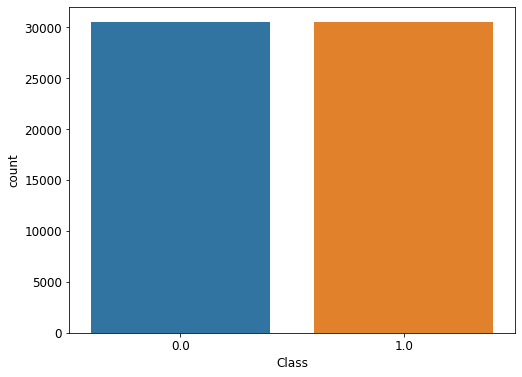

In [115]:
print(pd.Series(y_smo).value_counts())
sns.countplot(y_smo);

0.0    30478
1.0    30478
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


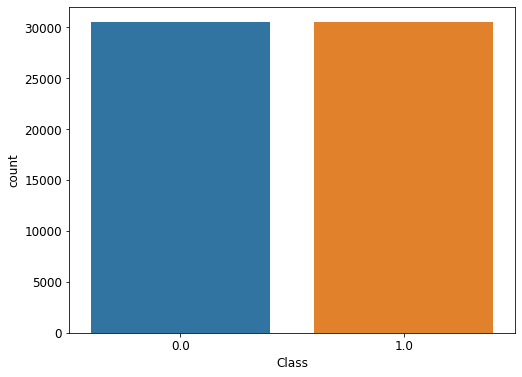

In [116]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print(pd.Series(y_ada).value_counts())
sns.countplot(y_ada);

In [117]:
randomFlorest =  RandomForestClassifier(n_estimators= 15, random_state = 42)
randomFlorest.fit(X_train,y_train)
predicition_randomFlorest = randomFlorest.predict(X_test)

In [118]:
randomFlorest_rus =  RandomForestClassifier(n_estimators= 15, random_state = 42)
randomFlorest_rus.fit(X_rus,y_rus)
predicition_randomFlorest_rus = randomFlorest_rus.predict(X_test)

In [119]:
print(classification_report(y_test,predicition_randomFlorest) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13052
         1.0       0.93      0.83      0.88        48

    accuracy                           1.00     13100
   macro avg       0.96      0.92      0.94     13100
weighted avg       1.00      1.00      1.00     13100



In [120]:
print(classification_report(y_test,predicition_randomFlorest_rus))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     13052
         1.0       0.16      0.85      0.26        48

    accuracy                           0.98     13100
   macro avg       0.58      0.92      0.63     13100
weighted avg       1.00      0.98      0.99     13100



In [121]:
randomFlorest_smo =  RandomForestClassifier(n_estimators= 15, random_state = 42)
randomFlorest_smo.fit(X_smo,y_smo)
predicition_randomFlorest_smo = randomFlorest_smo.predict(X_test)

In [122]:
print(classification_report(y_test,predicition_randomFlorest_smo))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13052
         1.0       0.93      0.81      0.87        48

    accuracy                           1.00     13100
   macro avg       0.96      0.91      0.93     13100
weighted avg       1.00      1.00      1.00     13100



In [123]:
randomFlorest_ada =  RandomForestClassifier(n_estimators= 15, random_state = 42)
randomFlorest_ada.fit(X_ada,y_ada)
predicition_randomFlorest_ada = randomFlorest_ada.predict(X_test)

In [124]:
print(classification_report(y_test,predicition_randomFlorest_ada))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13052
         1.0       0.98      0.83      0.90        48

    accuracy                           1.00     13100
   macro avg       0.99      0.92      0.95     13100
weighted avg       1.00      1.00      1.00     13100



In [125]:
precision = precision_score(y_test, predicition_randomFlorest)
recall = recall_score(y_test, predicition_randomFlorest)
f1 = f1_score(y_test, predicition_randomFlorest)
print(precision,recall,f1)

0.9302325581395349 0.8333333333333334 0.8791208791208791


In [126]:
logReg = LogisticRegression(max_iter=7600)

logReg.fit(X_train, y_train)

log_y_pred = logReg.predict(X_test)

log_precision = precision_score(y_test, log_y_pred)
log_recall = recall_score(y_test, log_y_pred)
log_f1 = f1_score(y_test, log_y_pred)

In [127]:
print(classification_report(y_test,log_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13052
         1.0       0.86      0.62      0.72        48

    accuracy                           1.00     13100
   macro avg       0.93      0.81      0.86     13100
weighted avg       1.00      1.00      1.00     13100



In [128]:
logReg_rus = LogisticRegression()

logReg_rus.fit(X_rus, y_rus)

log_y_pred = logReg_rus.predict(X_test)

In [129]:
print(classification_report(y_test,log_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13052
         1.0       0.20      0.88      0.33        48

    accuracy                           0.99     13100
   macro avg       0.60      0.93      0.66     13100
weighted avg       1.00      0.99      0.99     13100



In [130]:
model_log_smo = LogisticRegression(max_iter=7600)
model_log_smo.fit(X_smo, y_smo)
y_pred_smo = model_log_smo.predict(X_test)

In [131]:
print(classification_report(y_test,y_pred_smo))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     13052
         1.0       0.35      0.85      0.50        48

    accuracy                           0.99     13100
   macro avg       0.67      0.92      0.75     13100
weighted avg       1.00      0.99      0.99     13100



In [132]:
model_log_ada = LogisticRegression(max_iter=7600)
model_log_ada.fit(X_ada, y_ada)
y_pred_ada = model_log_ada.predict(X_test)

In [133]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     13052
         1.0       0.26      0.88      0.41        48

    accuracy                           0.99     13100
   macro avg       0.63      0.93      0.70     13100
weighted avg       1.00      0.99      0.99     13100



In [134]:


model = Sequential()

model.add(Dense(64,input_dim=30,activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

model.fit(X_train, y_train, epochs = 5,\
                    validation_data = (X_test, y_test))


Epoch 1/5
956/956 [==============================] - 4s 3ms/step - loss: 0.2022 - precision: 0.0080 - recall: 0.1047 - val_loss: 0.0268 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
956/956 [==============================] - 2s 3ms/step - loss: 0.0279 - precision: 0.5588 - recall: 0.2209 - val_loss: 0.0107 - val_precision: 0.8148 - val_recall: 0.4583
Epoch 3/5
956/956 [==============================] - 3s 3ms/step - loss: 0.0140 - precision: 0.7000 - recall: 0.4070 - val_loss: 0.0092 - val_precision: 0.8462 - val_recall: 0.6875
Epoch 4/5
956/956 [==============================] - 3s 3ms/step - loss: 0.0102 - precision: 0.7000 - recall: 0.4070 - val_loss: 0.0086 - val_precision: 0.8537 - val_recall: 0.7292
Epoch 5/5
956/956 [==============================] - 3s 3ms/step - loss: 0.0085 - precision: 0.6957 - recall: 0.5581 - val_loss: 0.0087 - val_precision: 0.8636 - val_recall: 0.7917


In [135]:
predicition_neuralNetWork =  model.predict(X_test)

In [136]:
print(classification_report(y_test,predicition_neuralNetWork.round()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13052
         1.0       0.86      0.79      0.83        48

    accuracy                           1.00     13100
   macro avg       0.93      0.90      0.91     13100
weighted avg       1.00      1.00      1.00     13100



In [137]:


model_rus = Sequential()

model_rus.add(Dense(64,input_dim=30,activation='relu'))
model_rus.add(Dense(32, activation = 'relu'))
model_rus.add(Dropout(0.5))
model_rus.add(Dense(16,activation = 'relu'))
model_rus.add(Dropout(0.15))
model_rus.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model_rus.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

model_rus.fit(X_rus, y_rus, epochs = 5,\
                    validation_data = (X_test, y_test))

Epoch 1/5
6/6 [==============================] - 2s 220ms/step - loss: 0.7958 - precision: 0.4923 - recall: 0.7442 - val_loss: 0.9296 - val_precision: 0.0038 - val_recall: 0.9792
Epoch 2/5
6/6 [==============================] - 1s 104ms/step - loss: 0.8797 - precision: 0.4806 - recall: 0.7209 - val_loss: 0.9235 - val_precision: 0.0038 - val_recall: 0.9792
Epoch 3/5
6/6 [==============================] - 1s 104ms/step - loss: 0.8716 - precision: 0.4762 - recall: 0.6977 - val_loss: 0.9184 - val_precision: 0.0039 - val_recall: 0.9792
Epoch 4/5
6/6 [==============================] - 1s 131ms/step - loss: 0.9376 - precision: 0.4567 - recall: 0.6744 - val_loss: 0.9131 - val_precision: 0.0039 - val_recall: 0.9792
Epoch 5/5
6/6 [==============================] - 1s 131ms/step - loss: 0.7614 - precision: 0.4855 - recall: 0.7791 - val_loss: 0.9063 - val_precision: 0.0039 - val_recall: 0.9792


In [138]:
predicition_neuralNetWork_rus =  model_rus.predict(X_test)

In [139]:
print(classification_report(y_test,predicition_neuralNetWork_rus.round()))

              precision    recall  f1-score   support

         0.0       1.00      0.08      0.15     13052
         1.0       0.00      0.98      0.01        48

    accuracy                           0.08     13100
   macro avg       0.50      0.53      0.08     13100
weighted avg       1.00      0.08      0.15     13100



In [140]:


model_smo = Sequential()

model_smo.add(Dense(64,input_dim=30,activation='relu'))
model_smo.add(Dense(32, activation = 'relu'))
model_smo.add(Dropout(0.5))
model_smo.add(Dense(16,activation = 'relu'))
model_smo.add(Dropout(0.15))
model_smo.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model_smo.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

model_smo.fit(X_smo, y_smo, epochs = 5,\
                    validation_data = (X_test, y_test))

Epoch 1/5
1905/1905 [==============================] - 6s 3ms/step - loss: 0.2456 - precision: 0.9081 - recall: 0.9125 - val_loss: 0.0348 - val_precision: 0.3818 - val_recall: 0.8750
Epoch 2/5
1905/1905 [==============================] - 4s 2ms/step - loss: 0.0406 - precision: 0.9936 - recall: 0.9897 - val_loss: 0.0171 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 3/5
1905/1905 [==============================] - 4s 2ms/step - loss: 0.0208 - precision: 0.9969 - recall: 0.9972 - val_loss: 0.0143 - val_precision: 0.7500 - val_recall: 0.8750
Epoch 4/5
1905/1905 [==============================] - 5s 2ms/step - loss: 0.0140 - precision: 0.9979 - recall: 0.9992 - val_loss: 0.0135 - val_precision: 0.8077 - val_recall: 0.8750
Epoch 5/5
1905/1905 [==============================] - 4s 2ms/step - loss: 0.0115 - precision: 0.9984 - recall: 0.9996 - val_loss: 0.0136 - val_precision: 0.8400 - val_recall: 0.8750


In [141]:
predicition_neuralNetWork_smo =  model_smo.predict(X_test)
print(classification_report(y_test,predicition_neuralNetWork_smo.round()))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13052
         1.0       0.84      0.88      0.86        48

    accuracy                           1.00     13100
   macro avg       0.92      0.94      0.93     13100
weighted avg       1.00      1.00      1.00     13100



In [142]:

model_ada = Sequential()

model_ada.add(Dense(64,input_dim=30,activation='relu'))
model_ada.add(Dense(32, activation = 'relu'))
model_ada.add(Dropout(0.5))
model_ada.add(Dense(16,activation = 'relu'))
model_ada.add(Dropout(0.15))
model_ada.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model_ada.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','Recall'])

model_ada.fit(X_ada, y_ada, epochs = 5,\
                    validation_data = (X_test, y_test))

Epoch 1/5
1905/1905 [==============================] - 6s 3ms/step - loss: 0.2512 - precision: 0.8397 - recall: 0.9585 - val_loss: 0.0371 - val_precision: 0.2593 - val_recall: 0.8750
Epoch 2/5
1905/1905 [==============================] - 5s 2ms/step - loss: 0.0406 - precision: 0.9914 - recall: 0.9954 - val_loss: 0.0176 - val_precision: 0.6364 - val_recall: 0.8750
Epoch 3/5
1905/1905 [==============================] - 5s 2ms/step - loss: 0.0204 - precision: 0.9967 - recall: 0.9991 - val_loss: 0.0144 - val_precision: 0.8077 - val_recall: 0.8750
Epoch 4/5
1905/1905 [==============================] - 4s 2ms/step - loss: 0.0150 - precision: 0.9975 - recall: 0.9995 - val_loss: 0.0145 - val_precision: 0.8077 - val_recall: 0.8750
Epoch 5/5
1905/1905 [==============================] - 4s 2ms/step - loss: 0.0113 - precision: 0.9981 - recall: 0.9998 - val_loss: 0.0142 - val_precision: 0.8235 - val_recall: 0.8750


In [143]:
predicition_neuralNetWork_ada =  model_ada.predict(X_test)

In [144]:
print(classification_report(y_test,predicition_neuralNetWork_ada.round()))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13052
         1.0       0.82      0.88      0.85        48

    accuracy                           1.00     13100
   macro avg       0.91      0.94      0.92     13100
weighted avg       1.00      1.00      1.00     13100

